BASIC CIFAR 10 EXAMPLE

Install Keras just in case...

In [ ]:
!pip3 install keras

Imports...

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD

from keras.callbacks import LearningRateScheduler as LRS
from keras.preprocessing.image import ImageDataGenerator

Define batch size, number of epochs and number of classes


In [ ]:
batch_size = 100
num_classes = 10
epochs = 75

Load MNIST and transform

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


170508288/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


DEFINE A DATA AUGMENTATION GENERATOR

> Bloque con sangría



In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

DEF A BLOCK CONV + BN + GN + MAXPOOL

In [ ]:
def CBGN(model,filters,ishape=0):
  if (ishape!=0):
    model.add(Conv2D(filters, (3, 3), padding='same',
                 input_shape=ishape))
  else:
    model.add(Conv2D(filters, (3, 3), padding='same'))
  
  model.add(BN())
  model.add(GN(0.3))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  
  return model

Define the NN topology, a sequential model with 2 hidden layers

In [ ]:
model = Sequential()

model=CBGN(model,32,x_train.shape[1:])
model=CBGN(model,64)
model=CBGN(model,128)
model=CBGN(model,256)
model=CBGN(model,512)

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
gaussian_noise (GaussianNois (None, 32, 32, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

Define an optimizer 

In [ ]:
opt = SGD(lr=0.1, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


DEFINE A LEARNING RATE SCHEDULER

In [ ]:
def scheduler(epoch):
    if epoch < 25:
        return .1
    elif epoch < 50:
        return 0.01
    else:
        return 0.001

# Callbacks
set_lr = LRS(scheduler)
es = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Compile the model, define loss and link the optimizer

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Finally, train the model and evaluate over the test data

In [ ]:
history=model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                  steps_per_epoch=len(x_train) / batch_size, 
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  callbacks=[set_lr, es],
                  verbose=1)

# Evaluate over test
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/75
500/500 [==============================] - 70s 47ms/step - loss: 2.0458 - accuracy: 0.3237 - val_loss: 1.4334 - val_accuracy: 0.4705
Epoch 2/75
500/500 [==============================] - 23s 46ms/step - loss: 1.4190 - accuracy: 0.4824 - val_loss: 2.0103 - val_accuracy: 0.3688
Epoch 3/75
500/500 [==============================] - 23s 46ms/step - loss: 1.2504 - accuracy: 0.5481 - val_loss: 1.4835 - val_accuracy: 0.5243
Epoch 4/75
500/500 [==============================] - 23s 45ms/step - loss: 1.1228 - accuracy: 0.5950 - val_loss: 1.5252 - val_accuracy: 0.5233
Epoch 5/75
500/500 [==============================] - 23s 45ms/step - loss: 1.0447 - accuracy: 0.6261 - val_loss: 1.2402 - val_accuracy: 0.5715
Epoch 6/75
500/500 [==============================] - 22s 45ms/step - loss: 0.9764 - accuracy: 0.6513 - val_loss: 1.9371 - val_accuracy: 0.5093
Epoch 7/75
500/500 [==============================] - 23s 45ms/step - loss: 0.9146 - accuracy: 0.6760 - val_loss: 1.1191 - val_accuracy:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
import matplotlib.pyplot as plt

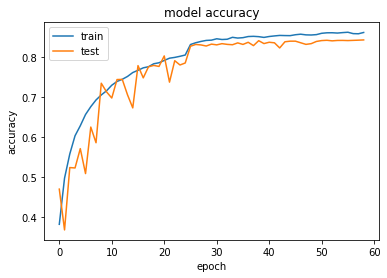

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()